# 송인욱 - 로즈데이, 어버이날과 꽃 트랜드

In [833]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rc
import seaborn as sns

In [834]:
FONT_PATH = './Data_Inuk/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=FONT_PATH).get_name()
rc('font', family=font_name)

## (1) 데이터 읽기

In [835]:
DIR = './Data_Inuk/'
ggJpRc = pd.read_csv(DIR+'google_japan_rc.csv', header=1)
ggUsaRc = pd.read_csv(DIR+'google_usa_rc.csv', header=1)
naKorRc = pd.read_excel(DIR+'naver_korea_rc.xlsx',header=6)
naKorPb = pd.read_excel(DIR+'naver_korea_pb.xlsx',header=6)
naShopFlower = pd.read_csv(DIR+'naver_shop_flower.csv', header=7)
naShopRc = pd.read_csv(DIR+'naver_shop_rc.csv', header=7)
dfList = [ggJpRc, ggUsaRc, naKorPb, naKorPb, naShopFlower, naShopRc]

c:\ProgramData\Anaconda3\envs\EV_PY39\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\ProgramData\Anaconda3\envs\EV_PY39\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [836]:
ggJpRc.head()

,주,カーネーション: (일본),バラ: (일본)
0,2021-07-11,4,38
1,2021-07-18,4,35
2,2021-07-25,4,33
3,2021-08-01,5,32
4,2021-08-08,5,34


In [837]:
ggUsaRc.head()

,주,rose day: (미국),carnation: (미국)
0,2021-07-11,22,62
1,2021-07-18,21,57
2,2021-07-25,20,61
3,2021-08-01,23,57
4,2021-08-08,26,70


In [838]:
naKorPb.head()

,날짜,벚꽃,날짜.1,핑크뮬리
0,2021-07-10,0.81980,2021-07-10,0.69495
1,2021-07-11,0.84989,2021-07-11,0.75362
2,2021-07-12,1.01836,2021-07-12,0.63929
3,2021-07-13,1.04845,2021-07-13,0.61673
4,2021-07-14,1.05145,2021-07-14,0.66336


In [839]:
naKorRc.head()

,날짜,장미,날짜.1,카네이션
0,2021-07-10,2.09376,2021-07-10,0.54848
1,2021-07-11,2.01738,2021-07-11,0.53220
2,2021-07-12,2.19895,2021-07-12,0.49714
3,2021-07-13,2.05870,2021-07-13,0.46959
4,2021-07-14,2.02239,2021-07-14,0.48462


In [840]:
naShopFlower.head()

,날짜,원예/식물
0,2021-07-10,38
1,2021-07-11,40
2,2021-07-12,38
3,2021-07-13,38
4,2021-07-14,36


In [841]:
naShopRc.head()

,날짜,장미,카네이션
0,2021-07-10,1,0
1,2021-07-11,1,0
2,2021-07-12,1,0
3,2021-07-13,0,0
4,2021-07-14,1,0


## (2) 데이터 전처리

### (2-1) 데이터 정제

#### (2-1-1) 결측치 확인

In [842]:
# 데이터프레임 리스트에서 결측치 확인해주는 함수
def missingVal(dflist):
    for i in dflist:
        print(f'{i.isnull().sum()}', '\n')

In [843]:
missingVal(dfList)

주                0
カーネーション: (일본)    0
バラ: (일본)         0
dtype: int64 

주                  0
rose day: (미국)     0
carnation: (미국)    0
dtype: int64 

날짜      0
벚꽃      0
날짜.1    0
핑크뮬리    0
dtype: int64 

날짜      0
벚꽃      0
날짜.1    0
핑크뮬리    0
dtype: int64 

날짜       0
원예/식물    0
dtype: int64 

날짜      0
장미      0
카네이션    0
dtype: int64 



### (2-2) 데이터 표준화

In [844]:
# 해외 데이터 한국어로 정리
ggJpRc = ggJpRc.rename(columns={'주': '날짜', 'カーネーション: (일본)': '카네이션', 'バラ: (일본)': '장미'})
ggUsaRc = ggUsaRc.rename(columns={'주': '날짜', 'rose day: (미국)': '장미', 'carnation: (미국)': '카네이션'})

In [845]:
# 필요없는 중복컬럼 정리
naKorPb = naKorPb.drop(columns='날짜.1')
naKorRc = naKorRc.drop(columns='날짜.1')

In [846]:
# 날짜 컬럼 datetime으로 바꿔주는 함수
def makeDatetime(*df:pd.DataFrame):
    for i in df:
        i['날짜'] = pd.to_datetime(i['날짜'])

In [847]:
# 함수실행
makeDatetime(ggJpRc, ggUsaRc, naKorRc, naKorPb, naShopFlower, naShopRc)

In [848]:
# df의 날짜컬럼 월단위로 나눈 리스트 만들어주는 함수
def makeDateList(df:pd.DataFrame):
    mr = pd.date_range(start=df['날짜'].min(), end=df['날짜'].max(), freq='MS')
    return list(mr.astype(str))

def makeDateList2(df:pd.DataFrame):
    mr = pd.date_range(start=df['날짜'].min(), end=df['날짜'].max(), freq='2MS')
    return list(mr.astype(str))

In [849]:
# 날짜별 데이터 월별 평균으로 그룹해서 집계해주는 함수
def nalToMonth(df:pd.DataFrame):
    df['날짜'] = df['날짜'].dt.to_period(freq='M')
    monGroup = df.groupby('날짜').mean().reset_index()
    monGroup['날짜'] = monGroup['날짜'].astype(str)
    return monGroup

### (2-3) 데이터 정규화

In [850]:
# 날짜를 제외한 컬럼 데이터를 정규화시킨 컬럼 추가한 df 반환
def makeNomal(df:pd.DataFrame):
    norDF = df.drop(columns='날짜')
    colList = list(norDF.columns)
    for i in colList:
        norDF[i + '_nor'] = norDF[i].apply(lambda x: (x - norDF[i].min()) / (norDF[i].max() - norDF[i].min()))
    result = pd.concat([df['날짜'], norDF], axis=1)
    return result

## (3) 데이터 추출 및 시각화

### (3-1) 각국에서의 장미, 카네이션 검색량 비교

#### (3-1-1) 한국
    - 카네이션과 비교했을때 장미의 검색량이 적음
    - 월별 변화를 보기 위해서 정규화시켜서 비교
    - 카네이션은 어버이날에 피크를 찍고 다른날에는 관심이 적으나 장미는 꾸준한 관심이 있고 5월달에 관심이 올라감
    - 그러나 로즈데이 때문인지 5월에 장미가 많이 피기 때문인지는 알 수 없음

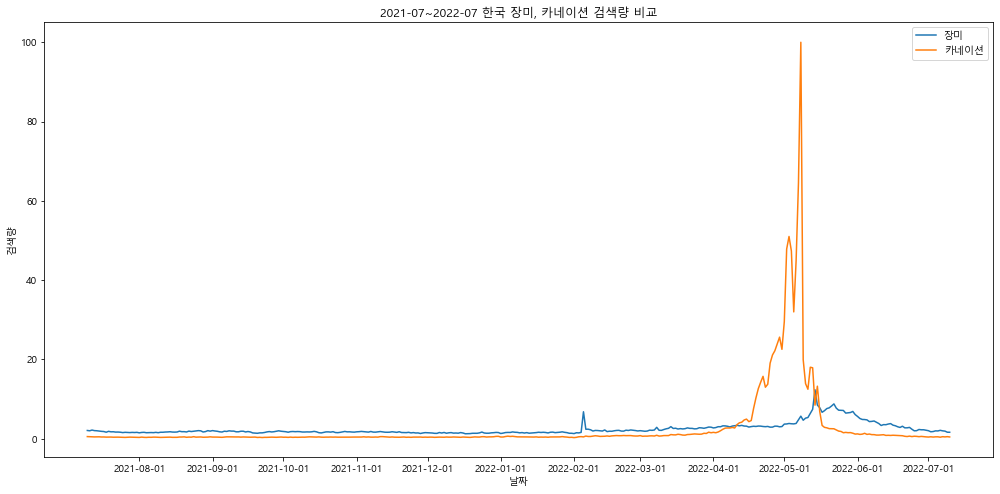

In [851]:
# 일반 비교
plt.figure(figsize=(17,8))
plt.plot(naKorRc['날짜'], naKorRc['장미'], label='장미')
plt.plot(naKorRc['날짜'], naKorRc['카네이션'], label='카네이션')
plt.title('2021-07~2022-07 한국 장미, 카네이션 검색량 비교')
plt.xlabel('날짜')
plt.ylabel('검색량')
plt.legend()
plt.xticks(makeDateList(naKorRc))
plt.show()

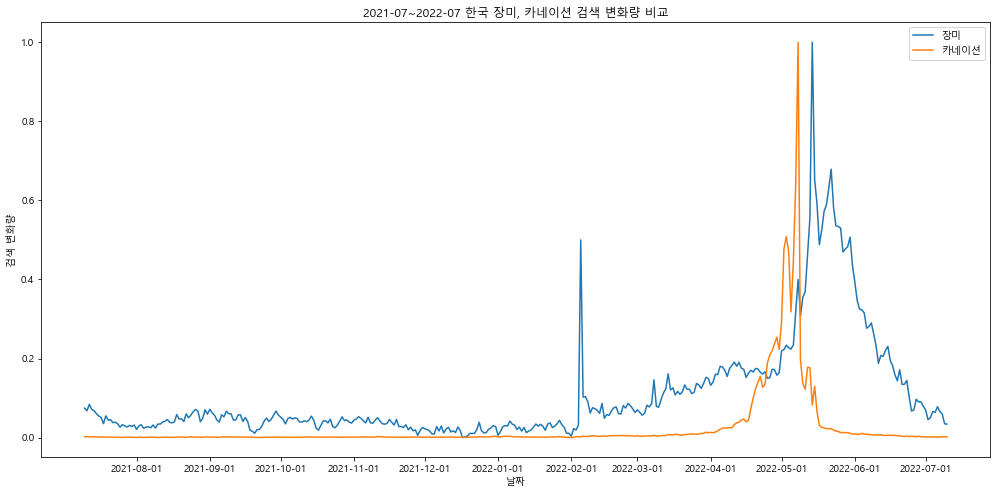

In [852]:
# 정규화시켜서 그래프
naKorRc_nor = makeNomal(naKorRc)
plt.figure(figsize=(17,8))
plt.plot(naKorRc_nor['날짜'], naKorRc_nor['장미_nor'], label='장미')
plt.plot(naKorRc_nor['날짜'], naKorRc_nor['카네이션_nor'], label='카네이션')
plt.title('2021-07~2022-07 한국 장미, 카네이션 검색 변화량 비교')
plt.xlabel('날짜')
plt.ylabel('검색 변화량')
plt.legend()
plt.xticks(makeDateList(naKorRc_nor))
plt.show()

#### (3-1-2) 미국, 일본
    - 미국, 일본 두나라 다 5월에 부모님께 카네이션을 주는 문화가 있음
    - 미국은 로즈데이가 발렌타인주에있고 일본은 로즈데이가 없음

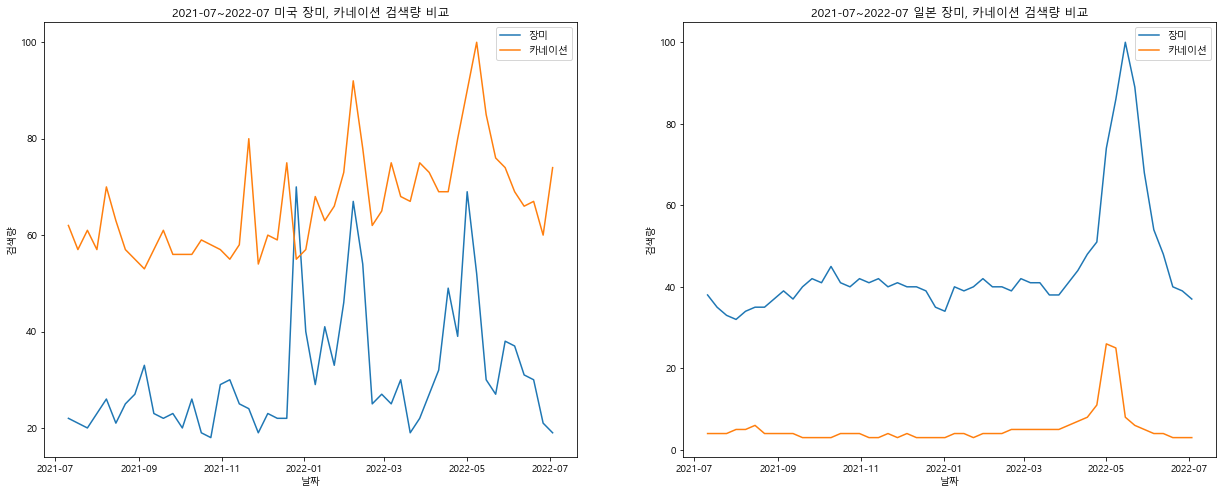

In [853]:
plt.figure(figsize=(21,8))

plt.subplot(122)
plt.plot(ggJpRc['날짜'], ggJpRc['장미'], label='장미')
plt.plot(ggJpRc['날짜'], ggJpRc['카네이션'], label='카네이션')
plt.title('2021-07~2022-07 일본 장미, 카네이션 검색량 비교')
plt.xlabel('날짜')
plt.ylabel('검색량')
plt.legend()


plt.subplot(121)
plt.plot(ggUsaRc['날짜'], ggUsaRc['장미'], label='장미')
plt.plot(ggUsaRc['날짜'], ggUsaRc['카네이션'], label='카네이션')
plt.title('2021-07~2022-07 미국 장미, 카네이션 검색량 비교')
plt.xlabel('날짜')
plt.ylabel('검색량')
plt.legend()


plt.show()

#### (3-1-3) 한, 미, 일
    - 한, 미, 일 정규화 비교결과를 보았을 때 한국의 5월 장미 검색량은 로즈데이때문이 아니라 5월에 장미가 많이 펴서 관심이 올라간거라고 볼 수 있음

In [854]:
naKorRc_mon_nor = makeNomal(nalToMonth(naKorRc))
ggJpRc_mon_nor = makeNomal(nalToMonth(ggJpRc))
ggUsaRc_mon_nor = makeNomal(nalToMonth(ggUsaRc))

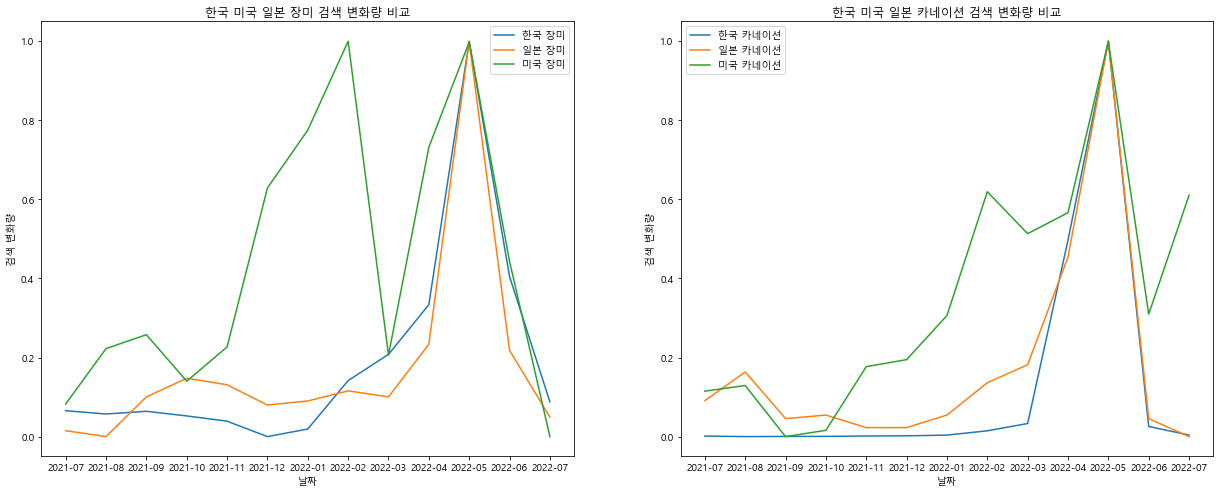

In [855]:
plt.figure(figsize=(21,8))

plt.subplot(121)
plt.plot(naKorRc_mon_nor['날짜'], naKorRc_mon_nor['장미_nor'], label='한국 장미')
plt.plot(ggJpRc_mon_nor['날짜'], ggJpRc_mon_nor['장미_nor'], label='일본 장미')
plt.plot(ggUsaRc_mon_nor['날짜'], ggUsaRc_mon_nor['장미_nor'], label='미국 장미')
plt.title('한국 미국 일본 장미 검색 변화량 비교')
plt.xlabel('날짜')
plt.ylabel('검색 변화량')
plt.legend()

plt.subplot(122)
plt.plot(naKorRc_mon_nor['날짜'], naKorRc_mon_nor['카네이션_nor'], label='한국 카네이션')
plt.plot(ggJpRc_mon_nor['날짜'], ggJpRc_mon_nor['카네이션_nor'], label='일본 카네이션')
plt.plot(ggUsaRc_mon_nor['날짜'], ggUsaRc_mon_nor['카네이션_nor'], label='미국 카네이션')
plt.title('한국 미국 일본 카네이션 검색 변화량 비교')
plt.xlabel('날짜')
plt.ylabel('검색 변화량')
plt.legend()

plt.show()

### (3-2) 네이버 쇼핑 클릭량

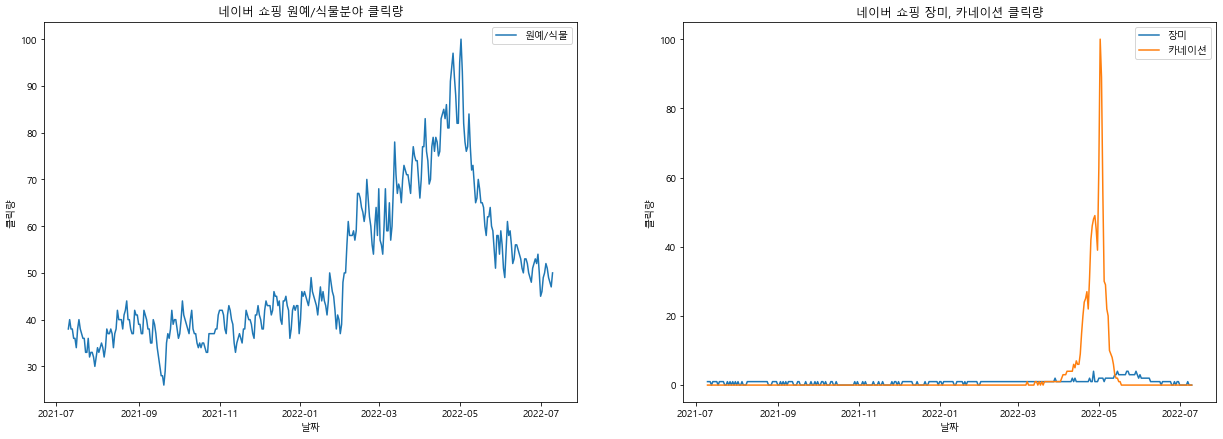

In [862]:
plt.figure(figsize=(21,7))

plt.subplot(121)
plt.plot(naShopFlower['날짜'], naShopFlower['원예/식물'], label='원예/식물')
plt.xlabel('날짜')
plt.ylabel('클릭량')
plt.title('네이버 쇼핑 원예/식물분야 클릭량')
plt.legend()

plt.subplot(122)
plt.plot(naShopRc['날짜'], naShopRc['장미'], label='장미')
plt.plot(naShopRc['날짜'], naShopRc['카네이션'], label='카네이션')
plt.xlabel('날짜')
plt.ylabel('클릭량')
plt.title('네이버 쇼핑 장미, 카네이션 클릭량')
plt.legend()

plt.show()